https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training")

print("Path to dataset files:", path)

100%|██████████████████████████████████████| 111k/111k [00:00<00:00, 50.4MB/s]

Extracting model files...
Path to dataset files: /Users/el_fer/.cache/kagglehub/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training/versions/1


In [6]:
 !ls /Users/el_fer/.cache/kagglehub/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training/versions/1

dirty_cafe_sales.csv


In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv(path+'/dirty_cafe_sales.csv')

In [36]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [38]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [39]:
new_col_names = ['transaction_id', 'item', 'quantity', 'price_per_unit', 'total_spent', 'payment_method', 'location', 'transaction_date']
df.columns = new_col_names

In [40]:
df.head()

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [41]:
df['transaction_id'].nunique()

10000

In [42]:
df['item'].value_counts(dropna=False)

item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
NaN          333
ERROR        292
Name: count, dtype: int64

In [43]:
df['quantity'].value_counts(dropna=False)

quantity
5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
NaN         138
Name: count, dtype: int64

In [44]:
df['price_per_unit'].value_counts(dropna=False)

price_per_unit
3.0        2429
4.0        2331
2.0        1227
5.0        1204
1.0        1143
1.5        1133
ERROR       190
NaN         179
UNKNOWN     164
Name: count, dtype: int64

In [45]:
df['total_spent'].value_counts(dropna=False)

total_spent
6.0        979
12.0       939
3.0        930
4.0        923
20.0       746
15.0       734
8.0        677
10.0       524
2.0        497
9.0        479
5.0        468
16.0       444
25.0       259
7.5        237
1.0        232
4.5        225
1.5        205
NaN        173
UNKNOWN    165
ERROR      164
Name: count, dtype: int64

In [46]:
df['payment_method'].value_counts(dropna=False)

payment_method
NaN               2579
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: count, dtype: int64

In [47]:
df['location'].value_counts(dropna=False)

location
NaN         3265
Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Name: count, dtype: int64

In [48]:
df['transaction_date'].value_counts(dropna=False)

transaction_date
UNKNOWN       159
NaN           159
ERROR         142
2023-06-16     40
2023-02-06     40
             ... 
2023-04-27     15
2023-09-24     15
2023-07-22     14
2023-03-11     14
2023-02-17     14
Name: count, Length: 368, dtype: int64

In [53]:
df['num_nulls'] = df.isna().sum(axis=1)

In [54]:
df.sort_values(by='transaction_id')

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date,num_nulls
2987,TXN_1000555,Tea,1,1.5,1.5,Credit Card,In-store,2023-10-19,0
115,TXN_1001832,Salad,2,5.0,10.0,Cash,Takeaway,NaN,1
418,TXN_1002457,Cookie,5,1.0,5.0,Digital Wallet,Takeaway,2023-09-29,0
3417,TXN_1003246,Juice,2,3.0,6.0,NaN,NaN,2023-02-15,2
4366,TXN_1004184,Smoothie,1,4.0,4.0,Credit Card,In-store,2023-05-18,0
...,...,...,...,...,...,...,...,...,...
1389,TXN_9996968,Sandwich,1,NaN,4.0,Cash,In-store,2023-10-14,1
7964,TXN_9997263,Cookie,2,1.0,2.0,NaN,NaN,2023-03-05,2
4304,TXN_9997620,Cookie,2,1.0,2.0,Cash,NaN,2023-12-11,1
98,TXN_9999113,Juice,4,3.0,12.0,Cash,Takeaway,2023-05-27,0


Finding: no correlation transaction_id and transaction_date

In [52]:
df = df.replace('ERROR', np.nan)
df = df.replace('UNKNOWN', np.nan)

In [55]:
df['num_nulls'].value_counts()

num_nulls
1    4285
0    3089
2    2136
3     439
4      47
5       4
Name: count, dtype: int64

In [58]:
df['total_spent']=df['total_spent'].astype(float)

In [60]:
df['quantity']=df['quantity'].astype(float)
df['price_per_unit']=df['price_per_unit'].astype(float)

In [74]:
df.loc[(df['total_spent'].isna())&(~df['price_per_unit'].isna())&(~df['quantity'].isna()),'total_spent'] = df['price_per_unit']*df['quantity']
df.loc[(df['price_per_unit'].isna())&(~df['total_spent'].isna())&(~df['quantity'].isna()),'price_per_unit'] = df['total_spent']/df['quantity']
df.loc[(df['quantity'].isna())&(~df['total_spent'].isna())&(~df['price_per_unit'].isna()),'quantity'] = df['total_spent']/df['price_per_unit']

In [76]:
df['num_nulls'] = df.isna().sum(axis=1)
df['num_nulls'].value_counts()

num_nulls
1    4457
0    3556
2    1756
3     212
4      16
5       3
Name: count, dtype: int64

In [71]:
df['total_spent'].isna().sum()

357

In [72]:
df[df['total_spent'].isna()]

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date,num_nulls
25,TXN_7958992,Smoothie,3.0,4.0,NaN,NaN,NaN,2023-12-13,3
31,TXN_8927252,NaN,2.0,1.0,NaN,Credit Card,NaN,2023-11-06,3
42,TXN_6650263,Tea,2.0,1.5,NaN,NaN,Takeaway,2023-01-10,2
65,TXN_4987129,Sandwich,3.0,NaN,NaN,NaN,In-store,2023-10-20,3
143,TXN_8495063,Juice,1.0,3.0,NaN,Cash,NaN,2023-05-31,2
...,...,...,...,...,...,...,...,...,...
9853,TXN_9266499,Cake,1.0,3.0,NaN,Digital Wallet,NaN,2023-02-16,2
9869,TXN_1975184,Coffee,NaN,2.0,NaN,Digital Wallet,NaN,2023-01-15,3
9893,TXN_3809533,Juice,2.0,NaN,NaN,Digital Wallet,Takeaway,2023-02-02,2
9988,TXN_9594133,Cake,5.0,3.0,NaN,NaN,NaN,NaN,4


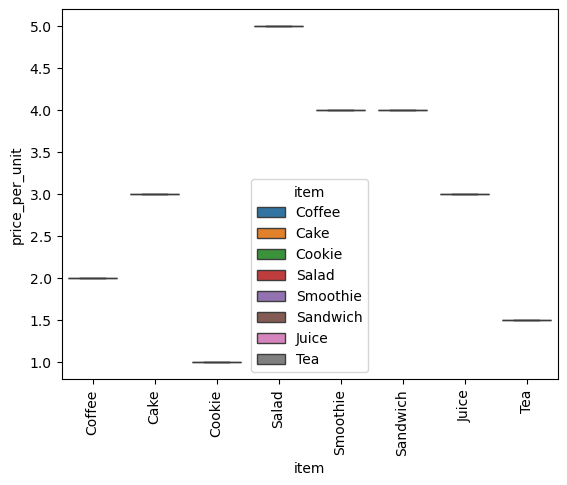

In [81]:
sns.boxplot(data=df, y='price_per_unit', x='item', hue='item')
plt.xticks(rotation=90)
plt.show()

In [83]:
df.groupby('item')['price_per_unit'].agg(['mean', 'std'])

,mean,std
item,,
Cake,3.0,0.0
Coffee,2.0,0.0
Cookie,1.0,0.0
Juice,3.0,0.0
Salad,5.0,0.0
Sandwich,4.0,0.0
Smoothie,4.0,0.0
Tea,1.5,0.0


In [86]:
price_dict = df.groupby('item')['price_per_unit'].agg('mean').to_dict()

In [87]:
df['price_per_unit'] = df['price_per_unit'].fillna(df['item'].map(price_dict))

In [91]:
df['num_nulls'] = df.isna().sum(axis=1)
df['num_nulls'].value_counts()

num_nulls
1    4471
0    3556
2    1755
3     202
4      15
5       1
Name: count, dtype: int64

In [94]:
df.loc[(df['total_spent'].isna())&(~df['price_per_unit'].isna())&(~df['quantity'].isna()),'total_spent'] = df['price_per_unit']*df['quantity']
df.loc[(df['price_per_unit'].isna())&(~df['total_spent'].isna())&(~df['quantity'].isna()),'price_per_unit'] = df['total_spent']/df['quantity']
df.loc[(df['quantity'].isna())&(~df['total_spent'].isna())&(~df['price_per_unit'].isna()),'quantity'] = df['total_spent']/df['price_per_unit']

In [95]:
df['num_nulls'] = df.isna().sum(axis=1)
df['num_nulls'].value_counts()

num_nulls
1    4470
0    3570
2    1745
3     201
4      13
5       1
Name: count, dtype: int64

In [96]:
df.head()

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date,num_nulls
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,0
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,0
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,0
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27,2
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,0


In [97]:
crosstab = pd.crosstab(df['payment_method'], df['location'])
print(crosstab)

location        In-store  Takeaway
payment_method                    
Cash                 702       664
Credit Card          681       669
Digital Wallet       695       744


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    10000 non-null  object 
 1   item              9031 non-null   object 
 2   quantity          9977 non-null   float64
 3   price_per_unit    9994 non-null   float64
 4   total_spent       9977 non-null   float64
 5   payment_method    6822 non-null   object 
 6   location          6039 non-null   object 
 7   transaction_date  9540 non-null   object 
 8   num_nulls         10000 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 703.3+ KB


In [99]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])